In [7]:
!pip install imageio

import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display


import tensorflow as tf

In [8]:
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

In [9]:
import os
import cv2
from keras.preprocessing.image import img_to_array
import tensorflow as tf
from tensorflow import keras
from keras.layers import UpSampling2D


In [39]:
default_image_size=tuple((64, 64))
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        image = cv2.cvtColor(image, cv2.cv2.COLOR_BGR2RGB)
        if image is not None :
            image = cv2.resize(image, default_image_size)  
            
            return  img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [40]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [41]:
directory_root_leye='/content/drive/My Drive/extract/output/left_eye'
image_list=[]
img_name=[]
list_img_filename=[]
import os

In [42]:
for  dirname,dis,filenames in os.walk(directory_root_leye):
    #list_img_array.append(dirname)
    for filename in filenames:
     
        if filename.endswith(".jpg") == True or filename.endswith(".JPG") == True:
            image_list.append(convert_image_to_array(os.path.join(dirname,filename)))
            img_name.append(dirname)
            list_img_filename.append(filename)

In [43]:
list_img_filename=np.array(list_img_filename)

In [44]:
list_img_filename.shape

(619,)

In [45]:
directory_root_reye='/content/drive/My Drive/extract/output/right_eye'
image_list_re=[]
for  dirname,dis,filenames in os.walk(directory_root_reye):
    #list_img_array.append(dirname)
    for filename in filenames[0:1500]:
     
        if filename.endswith(".jpg") == True or filename.endswith(".JPG") == True:
            image_list_re.append(convert_image_to_array(os.path.join(dirname,filename)))

In [46]:

directory_root_reye='/content/drive/My Drive/extract/output/nose'
image_list_no=[]
for  dirname,dis,filenames in os.walk(directory_root_reye):
    #list_img_array.append(dirname)
    for filename in filenames[0:1500]:
     
        if filename.endswith(".jpg") == True or filename.endswith(".JPG") == True:
            image_list_no.append(convert_image_to_array(os.path.join(dirname,filename)))

In [47]:
 directory_root_reye='/content/drive/My Drive/extract/output/lip'
image_list_lip=[]
for  dirname,dis,filenames in os.walk(directory_root_reye):
    #list_img_array.append(dirname)
    for filename in filenames[0:1500]:
     
        if filename.endswith(".jpg") == True or filename.endswith(".JPG") == True:
            image_list_lip.append(convert_image_to_array(os.path.join(dirname,filename)))

In [48]:
directory_root_reye='/content/drive/My Drive/extract/output/left_eyebrow'
image_list_ly=[]
for  dirname,dis,filenames in os.walk(directory_root_reye):
    #list_img_array.append(dirname)
    for filename in filenames[0:1500]:
     
        if filename.endswith(".jpg") == True or filename.endswith(".JPG") == True:
            image_list_ly.append(convert_image_to_array(os.path.join(dirname,filename)))

In [49]:
directory_root_reye='/content/drive/My Drive/extract/output/right_eyebrow'
image_list_ry=[]
for  dirname,dis,filenames in os.walk(directory_root_reye):
    #list_img_array.append(dirname)
    for filename in filenames[0:1500]:
     
        if filename.endswith(".jpg") == True or filename.endswith(".JPG") == True:
            image_list_ry.append(convert_image_to_array(os.path.join(dirname,filename)))

In [50]:
directory_root_reye='/content/drive/My Drive/extract/output/chin'
Y_train=[]
for  dirname,dis,filenames in os.walk(directory_root_reye):
    #list_img_array.append(dirname)
    for filename in filenames:
     
        if filename.endswith(".jpg") == True or filename.endswith(".JPG") == True:
            Y_train.append(convert_image_to_array(os.path.join(dirname,filename)))

In [51]:
image_list=np.array(image_list)
image_list_re=np.array(image_list_re)
image_list_no=np.array(image_list_no)
image_list_lip=np.array(image_list_lip)
image_list_ry=np.array(image_list_ry)
image_list_ly=np.array(image_list_ly)
Y_train=np.array(Y_train)

In [52]:

image_list.shape

(619, 64, 64, 3)

In [53]:
Y_train.shape

(619, 64, 64, 3)

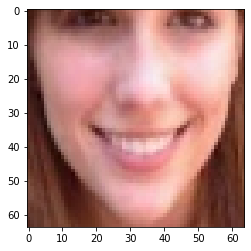

In [56]:
plt.imshow(Y_train[0]/255)

In [57]:
x_1=image_list/255
x_2=image_list_re/255
x_3=image_list_no/255
x_4=image_list_lip/255
x_5=image_list_ry/255
x_6=image_list_ly/255
y=Y_train/255



In [58]:
added_noise = np.random.randn(*(64,64))

In [59]:
noise_factor = 0.2
sample_image = y[101]
noisy_sample_image = sample_image + noise_factor * np.random.randn(*(64,64,3))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


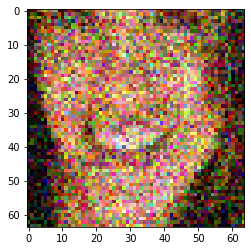

In [62]:
plt.imshow(noisy_sample_image)

In [63]:
X_N = []
noise_factor = 0.2

for sample_image in y:
  sample_image_noisy = sample_image + noise_factor * np.random.randn(*(64,64,3))
  sample_image_noisy = np.clip(sample_image_noisy, 0., 1.)
  X_N.append(sample_image_noisy)


In [64]:
X_N=np.array(X_N)
XX_N=X_N

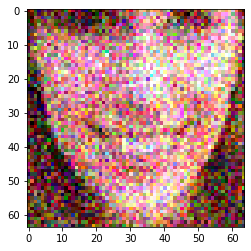

In [65]:
plt.imshow((tf.squeeze(XX_N[0])),cmap="gray")

In [66]:
left_eye_input=Input(shape=(64,64,3))
right_eye_input=Input(shape=(64,64,3))
left_eyebrow_input=Input(shape=(64,64,3))
right_eyebrow_input=Input(shape=(64,64,3))
nose_input=Input(shape=(64,64,3))
lip_input=Input(shape=(64,64,3))
X_le= left_eye_input
X_le=layers.Conv2DTranspose(32, (3, 3), strides=(1, 1), padding='same', use_bias=False)(X_le)
X_re= right_eye_input
X_re=layers.Conv2DTranspose(32, (3, 3), strides=(1, 1), padding='same', use_bias=False)(X_re)
x_l= left_eyebrow_input
x_l=layers.Conv2DTranspose(32, (3, 3), strides=(1, 1), padding='same', use_bias=False)(x_l)
x_r= right_eyebrow_input
x_r=layers.Conv2DTranspose(32, (3, 3), strides=(1, 1), padding='same', use_bias=False)(x_r)
x_n= nose_input
x_n=layers.Conv2DTranspose(32, (3, 3), strides=(1, 1), padding='same', use_bias=False)(x_n)
x_li= lip_input
x_li=layers.Conv2DTranspose(32, (3, 3), strides=(1, 1), padding='same', use_bias=False)(x_li)

from keras.layers import Concatenate

X1 = Concatenate()([X_le,X_re])
X1=layers.Conv2DTranspose(64, (5, 5), strides=(1, 1), padding='same', use_bias=False)(X1) 
X1=layers.BatchNormalization()(X1)
X1=layers.LeakyReLU()(X1)


X2 = Concatenate()([x_l,x_r])
X2=layers.Conv2DTranspose(64, (5, 5), strides=(1, 1), padding='same', use_bias=False)(X1) 
X2=layers.BatchNormalization()(X1)
X2=layers.LeakyReLU()(X1)



X3 = Concatenate()([x_n,x_li])
X3=layers.Conv2DTranspose(64, (5, 5), strides=(1, 1), padding='same', use_bias=False)(X3) 
X3=layers.BatchNormalization()(X3)
X3=layers.LeakyReLU()(X3)

#X=layers.Reshape((16, 16, 256))(X)
X = Concatenate()([X1,X2,X3])
    # Because we used "same" padding and stride = 1, the output is the same size as input 7 x 7 but with 128 filters instead
    # Resulting in 8 x 8x 128
X=layers.Conv2DTranspose(64, (5, 5), strides=(1, 1), padding='same', use_bias=False)(X) 
X=layers.BatchNormalization()(X)
X=layers.LeakyReLU()(X)

    # Because we used "same" padding and stride = 2, the output is double the size of the input 14 x 14 but with 64 filters instead
    # Resulting in 14 x 14 x 64
X=layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False)(X)
X=layers.BatchNormalization()(X)
X=layers.LeakyReLU()(X)

    # Because we used "same" padding and stride = 2, the output is double the size of the input 28 x 28 but with 1 filter instead
    # Resulting in 28 x 28 x 1
X=layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False)(X)
#X= layers.Conv2D(64, (3, 3), strides = (2, 2), kernel_initializer = glorot_uniform(seed=0))(X)
X=layers.BatchNormalization()(X)
X=layers.LeakyReLU()(X)

X= Conv2D(64, (2, 2), strides = (2, 2), kernel_initializer = glorot_uniform(seed=0))(X)
X=layers.BatchNormalization()(X)
X=MaxPooling2D((2, 2), padding='same')(X)
#X=layers.Conv2DTranspose(9, (5, 5), strides=(2, 2), padding='same', use_bias=False)(X) 
#X= Conv2D(32, (1, 1), strides = (1, 1))(X)
#X=layers.BatchNormalization()(X)
#X=layers.LeakyReLU()(X)
X= Conv2D(3, (3, 3), strides=(1, 1), padding='same', use_bias=False,activation='tanh')(X) 
generator= Model([left_eye_input,right_eye_input,left_eyebrow_input,right_eyebrow_input,nose_input,lip_input],X)
generator.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_transpose_13 (Conv2DTran (None, 64, 64, 32)   864         input_7[0][0]                    
__________________________________________________________________________________________________
conv2d_transpose_14 (Conv2DTran (None, 64, 64, 32)   864         input_8[0][0]                    
____________________________________________________________________________________________

In [67]:
def make_discriminator_model():
    data=Input(shape=(32,32,3))
    x=layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same')(data)
    x=layers.LeakyReLU()(x)
    x=layers.Dropout(0.3)(x)

    x=layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same')(x)
    x=layers.LeakyReLU()(x)
    x=layers.Dropout(0.3)(x)

    x=layers.Flatten()(x)
    x=layers.Dense(3072)(x)
    model=Model(data,x)

    return model

In [68]:
def genra():
  data=Input(shape=(64,64,3))
  
  # Let's build the encoder CNN
  x=Conv2D(18, (3,3), strides=1,padding="same", input_shape=(32, 32, 3))(data)
  x=layers.BatchNormalization()(x)
  x=layers.Activation('relu')(x)
  x=layers.AveragePooling2D((2,2), padding="same")(x)

  x=layers.Conv2D(32, (3,3), strides=1, padding="same")(x)
  x=layers.BatchNormalization()(x)
  x=layers.Activation('relu')(x)
  x=layers.AveragePooling2D((2,2), padding="same")(x)

  x=layers.Conv2D(16, (3,3), strides=1, padding="same")(x)
  x=layers.BatchNormalization()(x)
  x=layers.Activation('relu')(x)
  x=layers.AveragePooling2D((2,2), padding="same")(x) # Encoded image (Code Layer)


# Let's build the decoder CNN 
  x=layers.Conv2D(16, (3,3), strides=1, padding="same")(x)
  x=layers.BatchNormalization()(x)
  x=layers.Activation('relu')(x)
  x=layers.UpSampling2D((2, 2))(x)

  x=layers.Conv2D(32, (3,3), strides=1, padding="same")(x)
  x=layers.BatchNormalization()(x)
  x=layers.Activation('relu')(x)
  x=layers.UpSampling2D((2, 2))(x)


  x=layers.Conv2D(64, (3,3), strides=1, padding="same")(x)
  x=layers.BatchNormalization()(x)
  x=layers.Activation('relu')(x)
  x=layers.UpSampling2D((2, 2))(x)

  x=layers.Conv2D(3, (3,3), strides=1, activation='sigmoid', padding="same")(x)
  model=Model(data,x)
  return  model

In [69]:
discriminator = make_discriminator_model()

In [70]:
discriminator2=genra()

In [71]:
discriminator2.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 18)        504       
_________________________________________________________________
batch_normalization_15 (Batc (None, 64, 64, 18)        72        
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 18)        0         
_________________________________________________________________
average_pooling2d_1 (Average (None, 32, 32, 18)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        5216      
_________________________________________________________________
batch_normalization_16 (Batc (None, 32, 32, 32)        128 

In [72]:
discriminator2.compile(optimizer=keras.optimizers.Adam(lr=0.01),loss="binary_crossentropy",metrics=["accuracy"])

In [73]:
XX_N.shape

(619, 64, 64, 3)

In [74]:
discriminator2.fit(XX_N,y,epochs=20)

Epoch 1/20
619/619 [==============================] - 14s 22ms/step - loss: 0.6469 - accuracy: 0.0061
Epoch 2/20
619/619 [==============================] - 13s 21ms/step - loss: 0.5857 - accuracy: 0.0066
Epoch 3/20
619/619 [==============================] - 13s 20ms/step - loss: 0.5783 - accuracy: 0.0066
Epoch 4/20
619/619 [==============================] - 13s 21ms/step - loss: 0.5743 - accuracy: 0.0066
Epoch 5/20
619/619 [==============================] - 13s 20ms/step - loss: 0.5729 - accuracy: 0.0066
Epoch 6/20
619/619 [==============================] - 13s 20ms/step - loss: 0.5700 - accuracy: 0.0066
Epoch 7/20
619/619 [==============================] - 13s 21ms/step - loss: 0.5670 - accuracy: 0.0066
Epoch 8/20
619/619 [==============================] - 13s 21ms/step - loss: 0.5668 - accuracy: 0.0066
Epoch 9/20
619/619 [==============================] - 13s 21ms/step - loss: 0.5657 - accuracy: 0.0066
Epoch 10/20
619/619 [==============================] - 13s 21ms/step - loss: 0.563

In [75]:
c=discriminator2.predict(y[0:1])

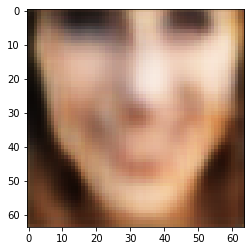

In [76]:
plt.imshow(c[0])

In [77]:
class VAE(keras.Model):
    def __init__(self, generator, discriminator1, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.generator =  generator
        self.discriminator2 = discriminator2

    def train_step(self, data):
        [x_1,x_2,x_3,x_4,x_5,x_6],y=data
        #if isinstance(data, tuple):
            #[x_1,x_2,x_3,x_4,x_5,x_6],y= data[0]

        with tf.GradientTape() as tape,tf.GradientTape() as dic_tape:
            z = generator([x_1,x_2,x_3,x_4,x_5,x_6])
            y_real = discriminator2(y)
            y_fack= discriminator2(z)
            
            fack_image_loss =tf.reduce_mean(keras.losses.binary_crossentropy(y,y_fack))
            true_image_loss =tf.reduce_mean(keras.losses.binary_crossentropy(y_real,z))

            
        grads = tape.gradient(fack_image_loss, self.discriminator2.trainable_weights)
        grads2 = dic_tape.gradient(true_image_loss, self.generator.trainable_weights)
        
        self.optimizer.apply_gradients(zip(grads, self.discriminator2.trainable_weights))
        self.optimizer.apply_gradients(zip(grads2, self.generator.trainable_weights))
        
        
          
        
        
          

        return {
            "fack_loss": fack_image_loss,
            "true_loss": true_image_loss,
        }


In [78]:
vae1 = VAE(generator, discriminator2)

In [79]:

vae1.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0003))

In [80]:
x_0=np.array(image_list)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


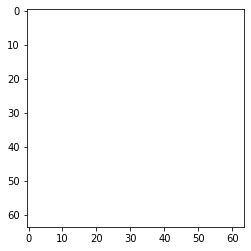

In [81]:
plt.imshow(x_0[0]/255)

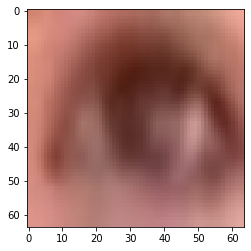

In [82]:
plt.imshow(x_2[0])

In [ ]:
x_1=
x_2=
x_3
x_4=
x_5=

In [83]:
vae1.fit([x_1,x_2,x_3,x_4,x_5,x_6],y, epochs=10, batch_size=12)

Epoch 1/10
52/52 [==============================] - 383s 7s/step - fack_loss: 0.6981 - true_loss: 2.0228
Epoch 2/10
52/52 [==============================] - 385s 7s/step - fack_loss: 0.6559 - true_loss: 0.6986
Epoch 3/10
52/52 [==============================] - 370s 7s/step - fack_loss: 0.6412 - true_loss: 0.6696
Epoch 4/10
52/52 [==============================] - 368s 7s/step - fack_loss: 0.6375 - true_loss: 0.6649
Epoch 5/10
52/52 [==============================] - 365s 7s/step - fack_loss: 0.6362 - true_loss: 0.6639
Epoch 6/10
52/52 [==============================] - 360s 7s/step - fack_loss: 0.6363 - true_loss: 0.6670
Epoch 7/10
52/52 [==============================] - 364s 7s/step - fack_loss: 0.6381 - true_loss: 0.6702
Epoch 8/10
52/52 [==============================] - 361s 7s/step - fack_loss: 0.6351 - true_loss: 0.6634
Epoch 9/10
52/52 [==============================] - 363s 7s/step - fack_loss: 0.6331 - true_loss: 0.6580
Epoch 10/10
52/52 [==============================] - 37

In [84]:

t=generator.predict(([x_1[0:1],x_2[0:1],x_3[0:1],x_4[0:1],x_5[0:1],x_6[0:1]]))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


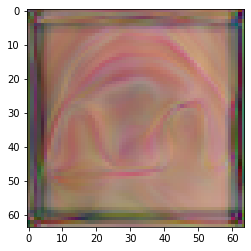

In [92]:
plt.imshow(t[0])

In [93]:
t1=discriminator2.predict(t[0:1])


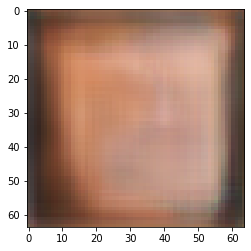

In [94]:
img_plot = plt.imshow(t1[0])
plt.show()

In [95]:
t2=discriminator2.predict(t1[0:1])

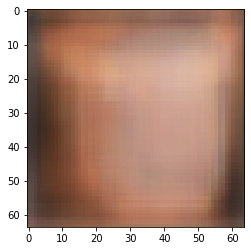

In [96]:

plt.imshow(t2[0])

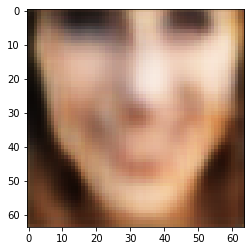

In [90]:
img_plot = plt.imshow(c[0])
plt.show()

In [97]:

from keras.models import load_model

In [100]:
generator.save('my_gen_gray.h5')

In [101]:
discriminator2.save('my_des_gray.h5')

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


In [103]:
import imageio
import numpy as np
import scipy.ndimage
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [104]:
def dodge(front,back): 
    result=front*255/(255-back)  
    result[result>255]=255 
    result[back==255]=255 
    return result.astype('uint8')

In [118]:
def sketch(img):
    gray_img = np.dot(img[...,:3], [0.299, 0.587, 0.114])
    inverted_img = 255 - gray_img
    blur_img = scipy.ndimage.filters.gaussian_filter(inverted_img,sigma=3)
    final_img= dodge(blur_img,gray_img)
    return final_img

In [119]:
 b=sketch(c[0])

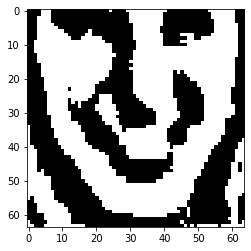

In [120]:
img_plot = plt.imshow(b ,cmap="gray")
plt.show()